# LB4

In [72]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import fpmax

## PART 1

In [73]:
all_data = pd.read_csv("data/groceries - groceries.csv")
all_data.head()

,Item(s),Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,4,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
np_data = all_data.to_numpy()
np_data = [[elem for elem in row[1:] if isinstance(elem,str)] for row in np_data]

In [75]:
unique_items = set()
for row in np_data:
    for elem in row:
        unique_items.add(elem)

In [76]:
print(unique_items)
print(len(unique_items))

{'brown bread', 'cream cheese', 'oil', 'pickled vegetables', 'dog food', 'grapes', 'condensed milk', 'syrup', 'canned beer', 'kitchen utensil', 'candles', 'tea', 'make up remover', 'herbs', 'sugar', 'soft cheese', 'chicken', 'frozen potato products', 'cream', 'potato products', 'brandy', 'toilet cleaner', 'zwieback', 'honey', 'bathroom cleaner', 'cereals', 'frozen dessert', 'butter milk', 'specialty chocolate', 'nut snack', 'Instant food products', 'sweet spreads', 'chocolate marshmallow', 'liver loaf', 'spread cheese', 'curd', 'frankfurter', 'canned fruit', 'cling film/bags', 'vinegar', 'popcorn', 'salt', 'pasta', 'hamburger meat', 'ham', 'meat spreads', 'flower (seeds)', 'hard cheese', 'sliced cheese', 'dental care', 'soda', 'specialty bar', 'cocoa drinks', 'female sanitary products', 'ketchup', 'salty snack', 'dessert', 'canned vegetables', 'baby cosmetics', 'processed cheese', 'sound storage medium', 'napkins', 'pork', 'seasonal products', 'skin care', 'bottled water', 'beef', 'sem

## PART 2

In [77]:
te = TransactionEncoder()
te_ary = te.fit(np_data).transform(np_data)
data = pd.DataFrame(te_ary, columns=te.columns_)
data.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [78]:
result = fpgrowth(data, min_support=0.03, use_colnames = True)
result['length'] = result['itemsets'].apply(lambda x: len(x))
result

,support,itemsets,length
0,0.082766,(citrus fruit),1
1,0.058566,(margarine),1
2,0.139502,(yogurt),1
3,0.104931,(tropical fruit),1
4,0.058058,(coffee),1
...,...,...,...
58,0.033249,"(pastry, whole milk)",2
59,0.047382,"(other vegetables, root vegetables)",2
60,0.048907,"(root vegetables, whole milk)",2
61,0.030605,"(sausage, rolls/buns)",2


In [79]:
for l in range(1, result['length'].max() +  1):
    print('[', result[result['length'] == l]['support'].min(), ';',
      result[result['length'] == l]['support'].max(), ']')

[ 0.03040162684290798 ; 0.25551601423487547 ]
[ 0.030096593797661414 ; 0.07483477376715811 ]


In [80]:
result = fpmax(data, min_support=0.03, use_colnames = True)
result['length'] = result['itemsets'].apply(lambda x: len(x))
result

,support,itemsets,length
0,0.030402,(specialty chocolate),1
1,0.031012,(onions),1
2,0.032944,(hygiene articles),1
3,0.033249,(berries),1
4,0.033249,(hamburger meat),1
5,0.033452,(UHT-milk),1
6,0.033859,(sugar),1
7,0.037112,(dessert),1
8,0.037417,(long life bakery product),1
9,0.037824,(salty snack),1


In [81]:
for l in range(1, result['length'].max() +  1):
    print('[', result[result['length'] == l]['support'].min(), ';',
      result[result['length'] == l]['support'].max(), ']')

[ 0.03040162684290798 ; 0.09852567361464158 ]
[ 0.030096593797661414 ; 0.07483477376715811 ]


<AxesSubplot:>

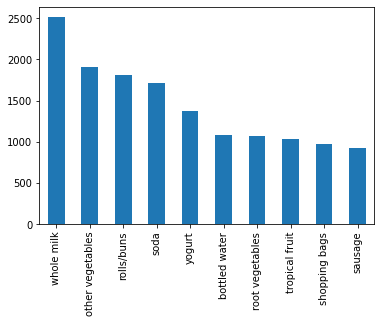

In [82]:
data.sum().nlargest(10).plot.bar()

In [83]:
items = ['whole milk', 'yogurt', 'soda', 'tropical fruit', 'shopping bags', 'sausage',
         'whipped/sour cream', 'rolls/buns', 'other vegetables', 'root vegetables',
         'pork', 'bottled water', 'pastry', 'citrus fruit', 'canned beer', 'bottled beer']
np_data = all_data.to_numpy()
np_data = [[elem for elem in row[1:] if isinstance(elem,str) and elem in items] for row in np_data]

In [84]:
te = TransactionEncoder()
te_ary = te.fit(np_data).transform(np_data)
data = pd.DataFrame(te_ary, columns=te.columns_)
data.head()

,bottled beer,bottled water,canned beer,citrus fruit,other vegetables,pastry,pork,rolls/buns,root vegetables,sausage,shopping bags,soda,tropical fruit,whipped/sour cream,whole milk,yogurt
0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False


In [85]:
result = fpgrowth(data, min_support=0.03, use_colnames=True)
result['length'] = result['itemsets'].apply(lambda x: len(x))
result

,support,itemsets,length
0,0.082766,(citrus fruit),1
1,0.139502,(yogurt),1
2,0.104931,(tropical fruit),1
3,0.255516,(whole milk),1
4,0.193493,(other vegetables),1
5,0.183935,(rolls/buns),1
6,0.080529,(bottled beer),1
7,0.110524,(bottled water),1
8,0.174377,(soda),1
9,0.088968,(pastry),1


In [86]:
result = fpmax(data, min_support=0.03, use_colnames=True)
result['length'] = result['itemsets'].apply(lambda x: len(x))
result

,support,itemsets,length
0,0.057651,(pork),1
1,0.032232,"(whole milk, whipped/sour cream)",2
2,0.077682,(canned beer),1
3,0.080529,(bottled beer),1
4,0.030503,"(whole milk, citrus fruit)",2
5,0.033249,"(pastry, whole milk)",2
6,0.030605,"(sausage, rolls/buns)",2
7,0.098526,(shopping bags),1
8,0.035892,"(other vegetables, tropical fruit)",2
9,0.042298,"(whole milk, tropical fruit)",2


In [87]:
np_data = all_data.to_numpy()
np_data = [[elem for elem in row[1:] if isinstance(elem,str)] for row in np_data]

te = TransactionEncoder()
te_ary = te.fit(np_data).transform(np_data)
data = pd.DataFrame(te_ary, columns=te.columns_)

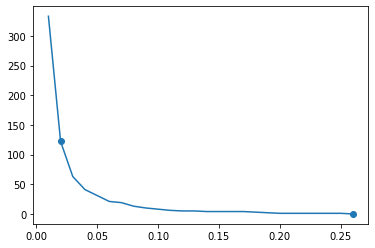

In [88]:
import numpy as np
import matplotlib.pyplot as plt

support_range = np.arange(0.01, 1, 0.01)
count = pd.Series(dtype='float64')
border = pd.Series(dtype='float64')
k = None
for support in support_range:
    result = fpgrowth(data, min_support=support, use_colnames=True)
    count[support] = len(result)

    length = result['itemsets'].apply(lambda x: len(x))
    if k is None:
        k = length.max()
    else:
        while k > 0 and len(length[length == k] == 0):
            border[support] = len(result)
            k -= 1

    if count[support] == 0:
        border[support] = len(result)
        break

plt.scatter(border.index, border)
plt.plot(count.index, count)
plt.show()

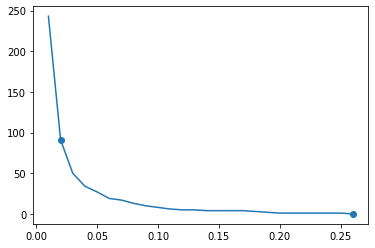

In [89]:
support_range = np.arange(0.01, 1, 0.01)
count = pd.Series(dtype='float64')
border = pd.Series(dtype='float64')
k = None
for support in support_range:
    result = fpmax(data, min_support=support, use_colnames=True)
    count[support] = len(result)

    length = result['itemsets'].apply(lambda x: len(x))
    if k is None:
        k = length.max()
    else:
        while k > 0 and len(length[length == k] == 0):
            border[support] = len(result)
            k -= 1

    if count[support] == 0:
        border[support] = len(result)
        break

plt.scatter(border.index, border)
plt.plot(count.index, count)
plt.show()

## PART 3

In [90]:
np_data = all_data.to_numpy()
np_data = [[elem for elem in row[1:] if isinstance(elem, str) and elem in items] for row in np_data]
np_data = [row for row in np_data if len(row) > 1]

te = TransactionEncoder()
te_ary = te.fit(np_data).transform(np_data)
data = pd.DataFrame(te_ary, columns=te.columns_)

In [91]:
result = fpgrowth(data, min_support=0.05, use_colnames=True)
result

,support,itemsets
0,0.241240,(yogurt)
1,0.185864,(tropical fruit)
2,0.421869,(whole milk)
3,0.335079,(other vegetables)
4,0.296214,(rolls/buns)
5,0.113371,(bottled beer)
6,0.185461,(bottled water)
7,0.146395,(citrus fruit)
8,0.267217,(soda)
9,0.196335,(root vegetables)


In [92]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(result, min_threshold=0.3)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(yogurt),(whole milk),0.241240,0.421869,0.110954,0.459933,1.090228,0.009183,1.070481
1,(yogurt),(other vegetables),0.241240,0.335079,0.085985,0.356427,1.063713,0.005150,1.033172
2,(tropical fruit),(yogurt),0.185864,0.241240,0.057994,0.312026,1.293423,0.013156,1.102890
3,(tropical fruit),(other vegetables),0.185864,0.335079,0.071083,0.382449,1.141370,0.008804,1.076706
4,(tropical fruit),(whole milk),0.185864,0.421869,0.083770,0.450704,1.068352,0.005359,1.052495
5,(other vegetables),(whole milk),0.335079,0.421869,0.148208,0.442308,1.048449,0.006849,1.036649
6,(whole milk),(other vegetables),0.421869,0.335079,0.148208,0.351313,1.048449,0.006849,1.025026
7,(rolls/buns),(whole milk),0.296214,0.421869,0.112163,0.378654,0.897564,-0.012801,0.930450
8,(bottled water),(whole milk),0.185461,0.421869,0.068063,0.366992,0.869921,-0.010177,0.913309
9,(bottled water),(soda),0.185461,0.267217,0.057390,0.309446,1.158033,0.007832,1.061153


In [93]:
rules = association_rules(result, metric='lift', min_threshold = 1.1)

In [94]:
rules = association_rules(result, min_threshold = 0.4, metric='confidence')

rules["antecedents"] = rules["antecedents"].apply(lambda x: list(x)[0]).astype("unicode")
rules["consequents"] = rules["consequents"].apply(lambda x: list(x)[0]).astype("unicode")

rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,yogurt,whole milk,0.241240,0.421869,0.110954,0.459933,1.090228,0.009183,1.070481
1,tropical fruit,whole milk,0.185864,0.421869,0.083770,0.450704,1.068352,0.005359,1.052495
2,other vegetables,whole milk,0.335079,0.421869,0.148208,0.442308,1.048449,0.006849,1.036649
3,citrus fruit,whole milk,0.146395,0.421869,0.060411,0.412655,0.978159,-0.001349,0.984313
4,root vegetables,other vegetables,0.196335,0.335079,0.093838,0.477949,1.426378,0.028050,1.273671
5,root vegetables,whole milk,0.196335,0.421869,0.096859,0.493333,1.169400,0.014031,1.141049
6,whipped/sour cream,whole milk,0.124245,0.421869,0.063834,0.513776,1.217858,0.011419,1.189023
7,whipped/sour cream,other vegetables,0.124245,0.335079,0.057189,0.460292,1.373683,0.015557,1.232002
8,pastry,whole milk,0.150624,0.421869,0.065848,0.437166,1.036260,0.002304,1.027179


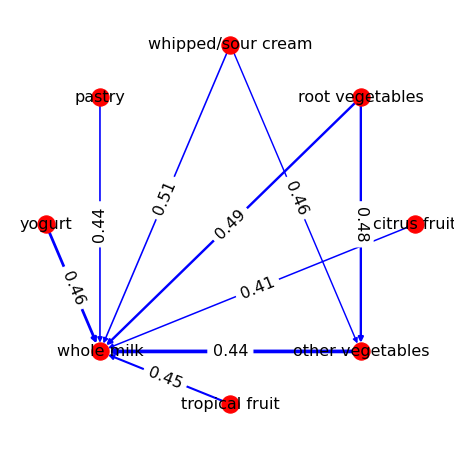

In [95]:
import networkx as nx
from matplotlib.pyplot import figure

G = nx.from_pandas_edgelist(rules, 'antecedents', 'consequents', ['confidence', 'support'], create_using=nx.DiGraph())

labels = {}
for u, v, data in G.edges(data=True):
    labels[(u, v)] = round(data['confidence'], 2)

figure(figsize=(8, 8))
pos = nx.shell_layout(G)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=16, font_color='black')
nx.draw_networkx_labels(G, pos, font_size=16, font_color='black')
nx.draw(G, pos, arrows=True, width=rules['support'] * 25, node_color='red', edge_color='blue')

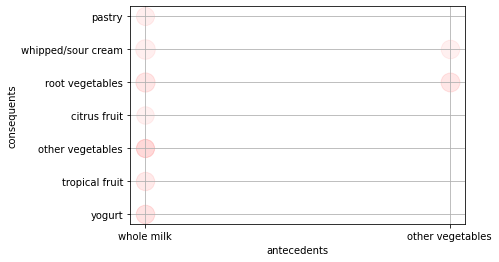

In [96]:
plt.xlabel('antecedents')
plt.ylabel('consequents')
plt.grid()

for _, row in rules.iterrows():
    plt.scatter(row['consequents'], row['antecedents'],
                s=row['confidence'] * 750, color='red', alpha=row['support'])

plt.show()